# Supervised Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from rdkit import Chem
from rdkit.Chem import AllChem

# Classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
# Regression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('cyp3a4-clean.smi', sep='\t')
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=2048) for s in df.smiles.tolist()]

pca = PCA(n_components=1024)
crds_pca = pca.fit_transform(fps)

y_true_cls = np.array(df.status.astype('int64').tolist())
y_true_reg = np.array(df.pval.tolist()).reshape(-1, 1)

## Classification algorithms

In [3]:
X = crds_pca[:int(0.75 * len(crds_pca))]
y = y_true_cls[:int(0.75 * len(y_true_cls))]

X_val = crds_pca[int(0.75 * len(crds_pca)):]
y_val = y_true_cls[int(0.75 * len(y_true_cls)):]

### Gaussian Naive Bayes

In [4]:
# Create a linear regression model
model = GaussianNB()

# Shuffle data and apply 5-fold cross-validation technique
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.30 precision with a standard deviation of 0.05


In [5]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [6]:
# prediction
model.fit(X, y)
y_pred = model.predict(X_val)

In [7]:
# coefficient of determination (R²)
r_sq = model.score(X, y)
print(f"Coefficient of determination: {round(r_sq, 3)}")

Coefficient of determination: 0.6


Text(113.92222222222219, 0.5, 'predicted label')

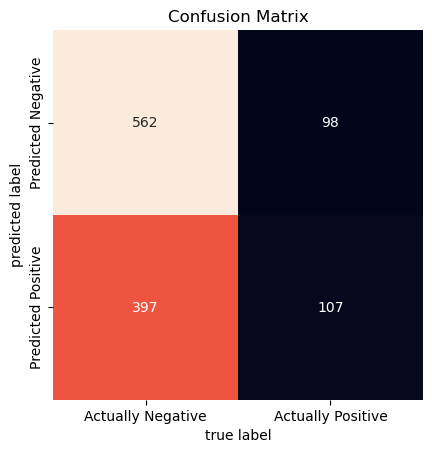

In [8]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [9]:
print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', round(precision_score(y_val, y_pred), 2), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

Recall: 0.52 
Precision 0.21 
Accuracy 0.57


### C-Support Vector Classification

In [10]:
model = SVC(kernel='linear', C=1, random_state=0)

scoring = ['recall', 'precision']
scores = cross_validate(model, X, y, scoring=scoring)

print("%0.2f precision with a standard deviation of %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))

0.33 precision with a standard deviation of 0.02
0.40 recall with a standard deviation of 0.07


Recall: 0.52 
Precision 0.3022598870056497 
Accuracy 0.7


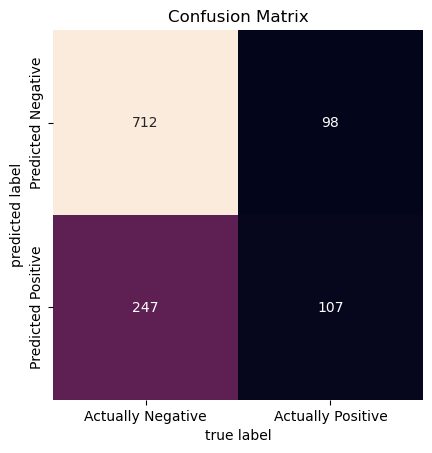

In [11]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

### Decision Tree Classifier

In [12]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.36 precision with a standard deviation of 0.07


Recall: 0.36 
Precision 0.2569444444444444 
Accuracy 0.7


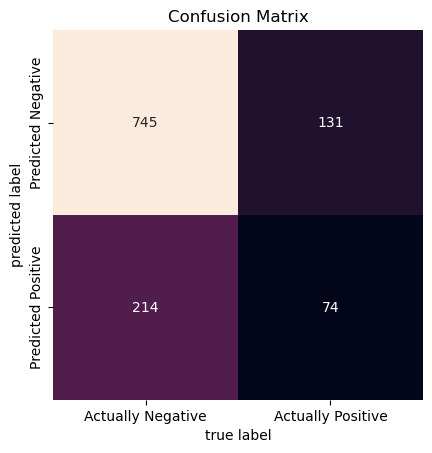

In [13]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

### Pipeline

Pipeline of transforms with a final estimator. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

In [14]:
pipe = Pipeline([
#          ('gaussian', GaussianNB()),
#          ('dtree', DecisionTreeClassifier()),
#          ('svc', SVC()),
         ('knn', KNeighborsClassifier())
])
pipe.fit(X, y)
print(f"Coefficient of determination: {round(pipe.score(X, y), 3)}")

Coefficient of determination: 0.893


### Grid Search Cross-Validation

It runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters, based on a scoring metric of your choice.

#### Machine learning models valudation algorithms

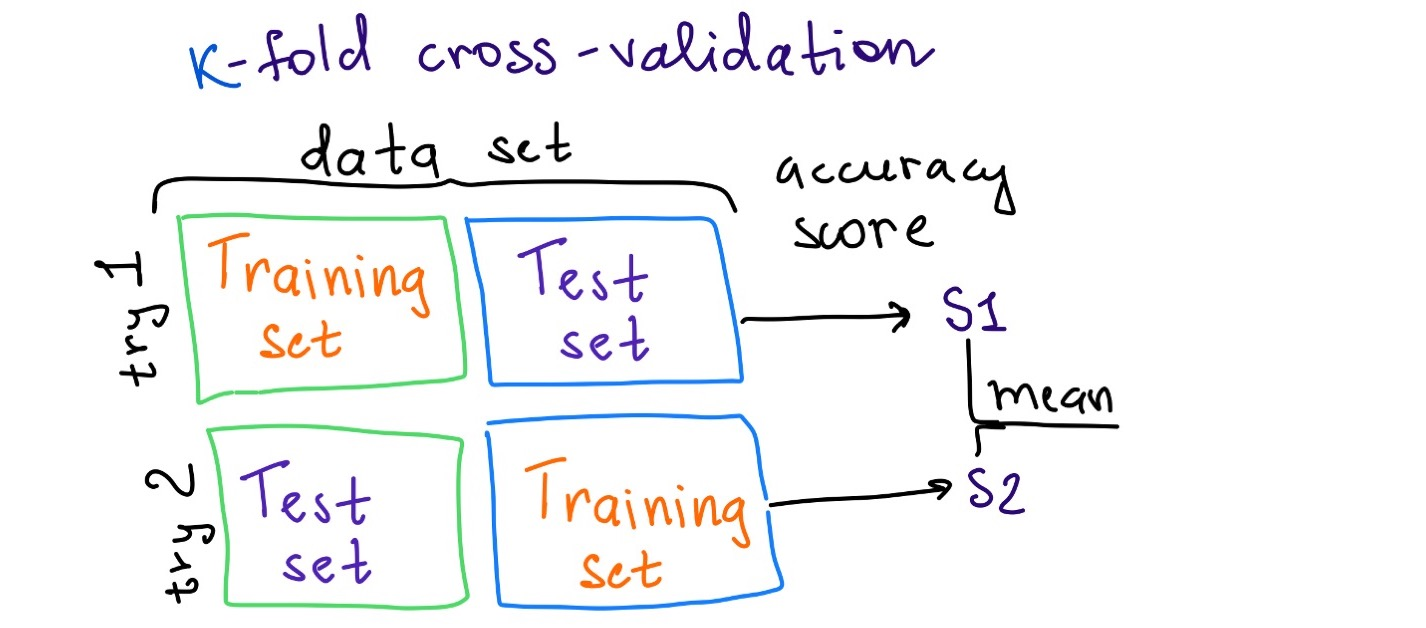

In [15]:
pipe = Pipeline([
#     ('nb', GaussianNB()),
#     ('dtc', DecisionTreeClassifier()),
#     ('svc', SVC()),
    ('knn', KNeighborsClassifier())
                    ])

params = [{
#     'dtc__max_depth':[3, 10]
#     'svc__kernel':('linear', 'rbf'), 
#     'svc__C':[1, 10],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'cosine'],
    'knn__leaf_size': [15, 20]
          }]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='recall',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

The best parametrs: {'knn__leaf_size': 15, 'knn__metric': 'cosine', 'knn__n_neighbors': 3, 'knn__weights': 'distance'} 
Score: 0.997


Recall: 0.31 
Precision 0.5294117647058824 
Accuracy 0.83


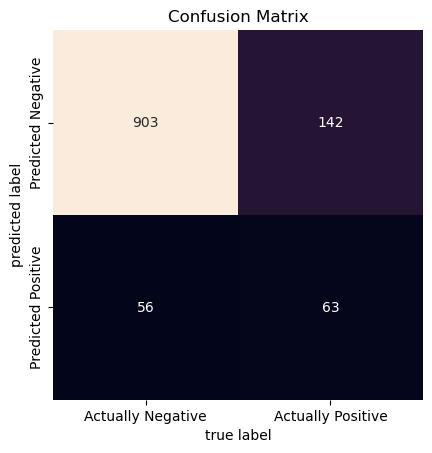

In [16]:
model = KNeighborsClassifier(leaf_size=15, n_neighbors=3, weights='uniform')
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

## Regresion algorithms

In [17]:
y = y_true_reg[:int(0.75 * len(y_true_reg))].ravel()

In [18]:
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
rf.fit(X, y)
y_pred = rf.predict(X_val)

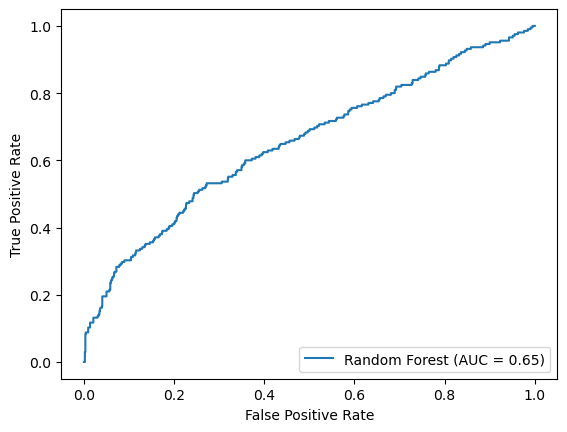

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Random Forest')
display.plot()

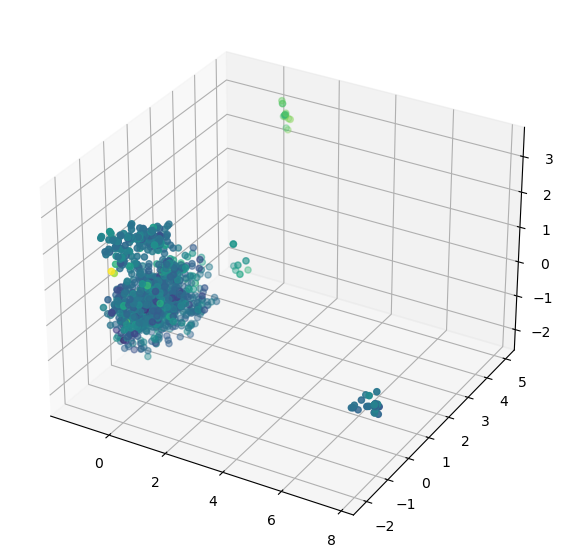

In [20]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_val[:, 0], X_val[:, 1], X_val[:, 2], c=y_pred)
plt.show()

## Conclusion

1. We learned about different model validation algorithms
2. We evaluated and compared the prediction accuracy of several classification algorithms on the data
3. We evaluated and compared the prediction accuracy of several regrassion algorithms on the data

What approaches do you remember? Follow the link and create the smartest model for discovering new Cytochrome P450 3A4 inhibitors

Challenge!
[The place for your personal growth](https://github.com/meddwl/skillbox/blob/main/QSAR/QSAR.ipynb)